In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hockey_rink import NHLRink
from scipy.stats import binned_statistic, binned_statistic_2d

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df_games = pd.read_csv('data/Linhac_df_processed.csv', index_col=0)
df_move = pd.read_csv("data/Linhac_df_move.csv", index_col=0)
df_old = pd.read_csv("data/Linhac24_Sportlogiq.csv", index_col=0)


In [3]:
# Some of the sequences of this file are taken and adopted from the work of David Sumpter and and Aleksander Andrzejewski on Expected Threat (https://soccermatics.readthedocs.io/en/latest/gallery/lesson4/plot_ExpectedThreat.html). We do not take any credit for these sequences 

In [4]:
df_move.eventname.value_counts()

eventname
pass       128975
lpr        107131
carry       33914
shot        16348
dumpout      9367
dumpin       8570
Name: count, dtype: int64

In [5]:
df_shots = df_move.loc[df_move['eventname'] == 'shot']
df_goals = df_games.loc[df_games['eventname'].isin(['goal'])]
df_shots.head()

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code,is_exit,is_entry,is_blocked,is_saved,is_assist,is_goal,next_event,interruption,next_teamid,next_teaminpossession,prev_event,xadjcoord_end,yadjcoord_end
71,72393,172367.0,814,710249,553243.0,885,885.0,12.0,0.007322,60.533333,shot,0,evenStrength,5,failed,1,F,0,5,outside,64.574402,-28.917648,71,0,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,885,885.0,controlledentry,NaN,NaN
91,72393,172367.0,814,597619,553243.0,885,885.0,15.0,0.003416,79.333336,shot,0,powerPlay,4,successful,1,D,0,5,outside,34.397934,-8.297058,91,1,0.0,0.0,0.0,1.0,0.0,0.0,save,0,814,NaN,reception,NaN,NaN
117,72393,553243.0,885,295519,172367.0,814,814.0,19.0,0.179716,96.266670,shot,1,shortHanded,5,successful,1,F,0,4,slot,78.755966,-3.767635,117,1,0.0,0.0,0.0,0.0,0.0,1.0,goal,0,814,814.0,reception,NaN,NaN
135,72393,172367.0,814,377117,553243.0,885,885.0,21.0,0.148124,109.666664,shot,0,powerPlay,4,failed,1,F,-1,5,slot,79.159698,-9.302940,135,0,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,814,814.0,reception,NaN,NaN
186,72393,172367.0,814,727892,553243.0,885,885.0,28.0,0.014037,170.766660,shot,0,powerPlay,4,successful,1,F,-1,5,slot,57.038174,-21.827553,186,1,0.0,0.0,0.0,1.0,0.0,0.0,save,0,814,NaN,controlledentry,NaN,NaN


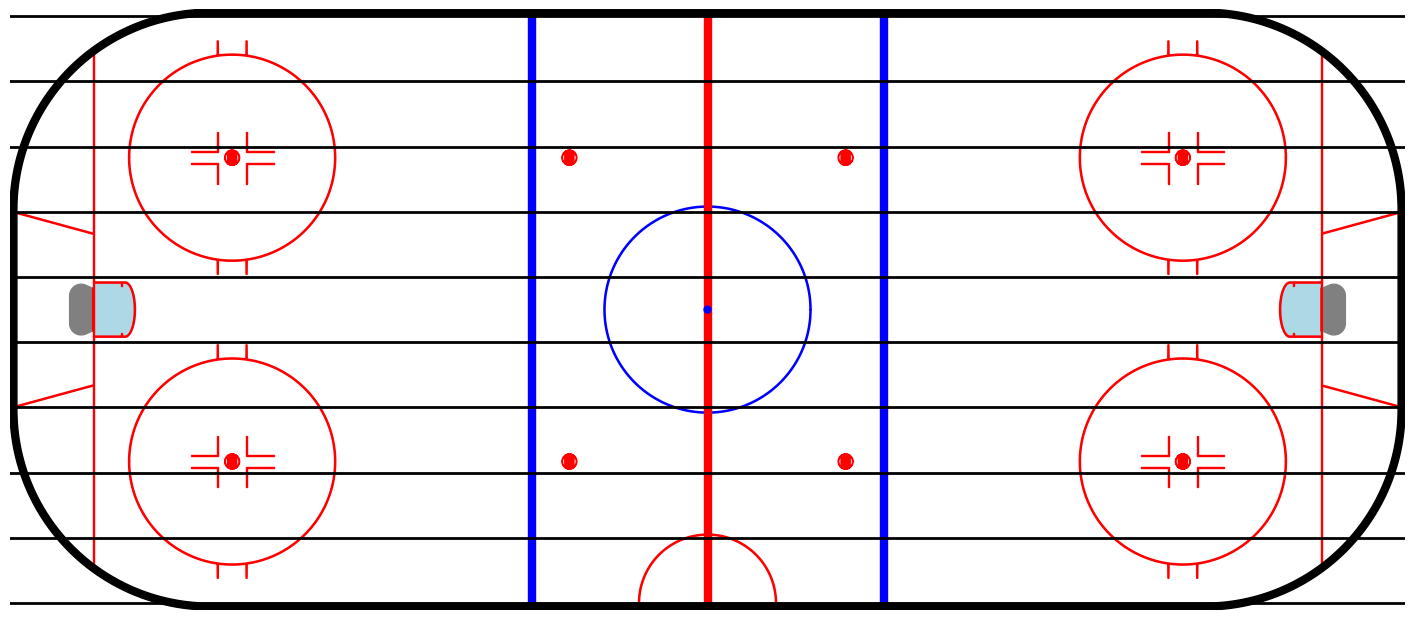

In [57]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
# for i in (89 / 7) * np.arange(-8, 9):
#     ax.axvline(i, color='black', lw=2, zorder=100)

for i in 85 / 9 * np.arange(-4.5, 5):
    ax.axhline(i, color='black', lw=2, zorder=100)
# ax.axvline(-50, color='black', lw=2, zorder=100)
# ax.axvline(-25, color='black', lw=2, zorder=100)
# ax.axvline(0, color='black', lw=2, zorder=100)
# ax.axvline(25, color='black', lw=2, zorder=100)
# ax.axvline(50, color='black', lw=2, zorder=100)

plt.show()

fig.savefig('figs/xt_grid_final.png',bbox_inches='tight')

In [7]:
85 / 9 * np.arange(-4.5, 5)

array([-42.5       , -33.05555556, -23.61111111, -14.16666667,
        -4.72222222,   4.72222222,  14.16666667,  23.61111111,
        33.05555556,  42.5       ])

In [8]:
(89 / 7) * np.arange(-8, 9)

array([-101.71428571,  -89.        ,  -76.28571429,  -63.57142857,
        -50.85714286,  -38.14285714,  -25.42857143,  -12.71428571,
          0.        ,   12.71428571,   25.42857143,   38.14285714,
         50.85714286,   63.57142857,   76.28571429,   89.        ,
        101.71428571])

$9 \times 16$

In [9]:
moving_actions = binned_statistic_2d(df_move['yadjcoord'], df_move['xadjcoord'], None, statistic='count', bins=[ 85 / 9 * np.arange(-4.5, 5), (89 / 7) * np.arange(-8, 9)])

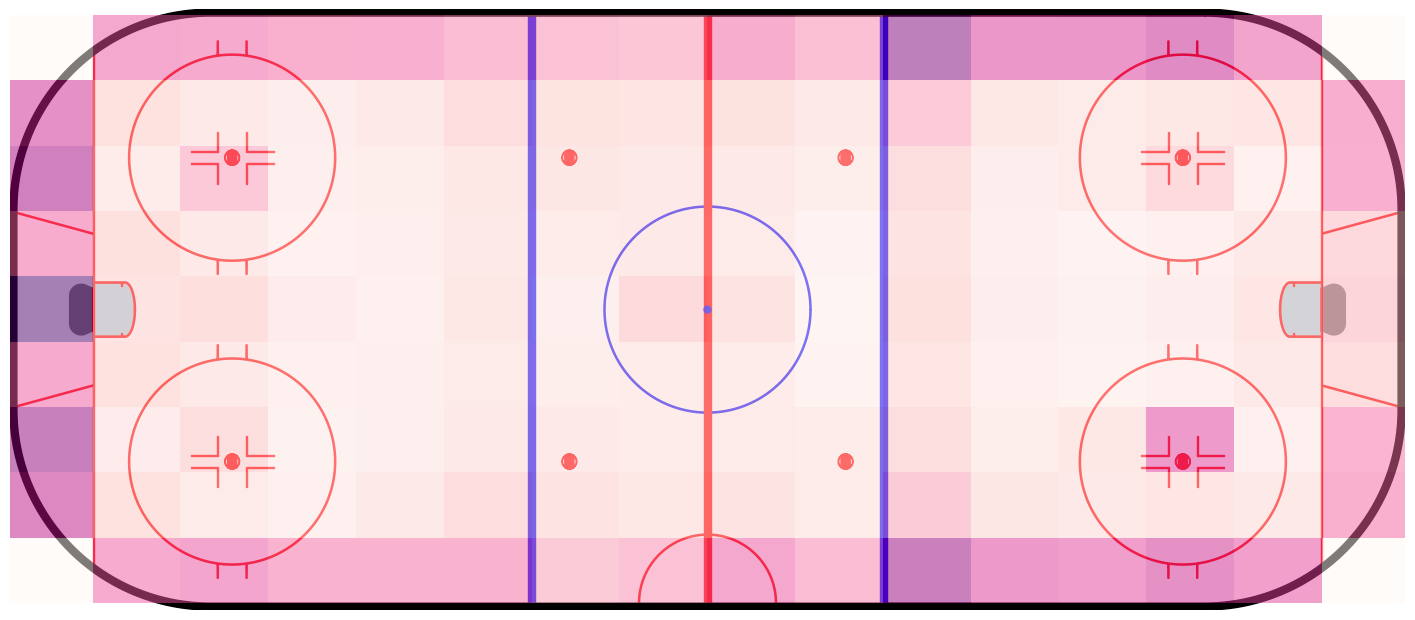

In [10]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(moving_actions.statistic, cmap='RdPu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [11]:
shots = binned_statistic_2d(df_shots['yadjcoord'], df_shots['xadjcoord'], None, statistic='count', bins=[ 85 / 9 * np.arange(-4.5, 5), (89 / 7) * np.arange(-8, 9)])

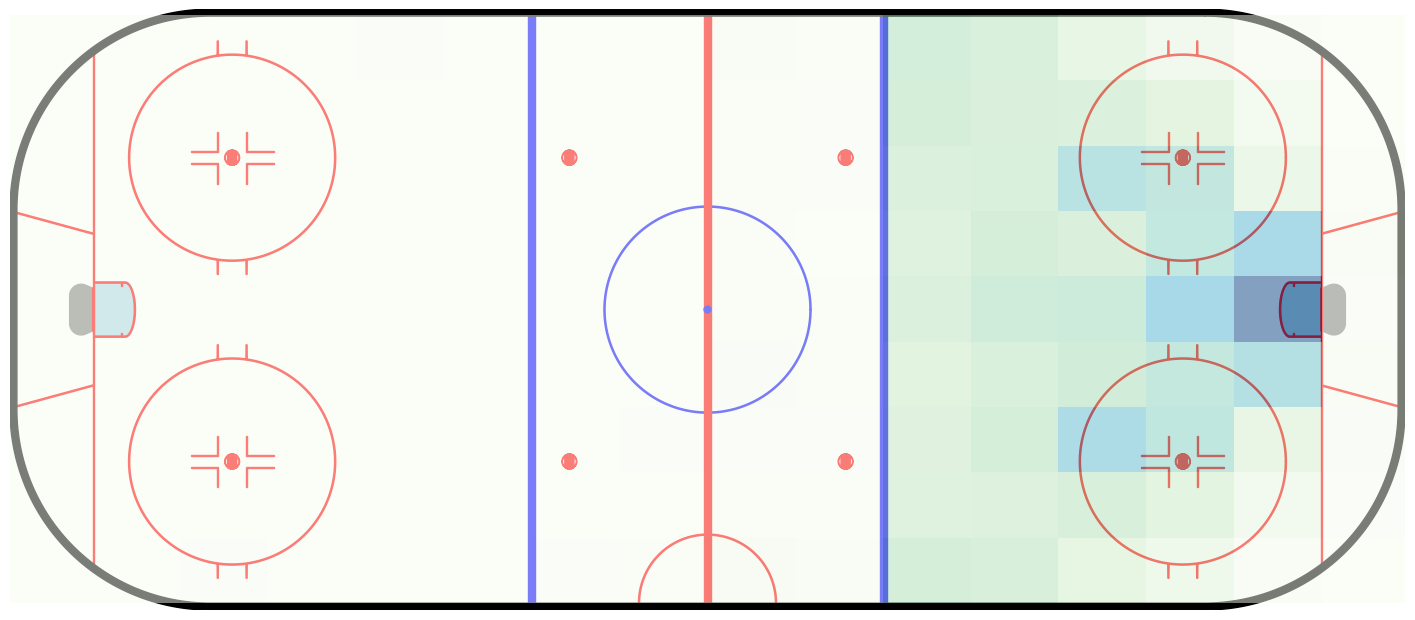

In [12]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(shots.statistic, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [13]:
goals = binned_statistic_2d(df_shots.loc[df_shots['is_goal'] == 1,'yadjcoord'], df_shots.loc[df_shots['is_goal'] == 1,'xadjcoord'], None, statistic='count', bins=[ 85 / 9 * np.arange(-4.5, 5), (89 / 7) * np.arange(-8, 9)])

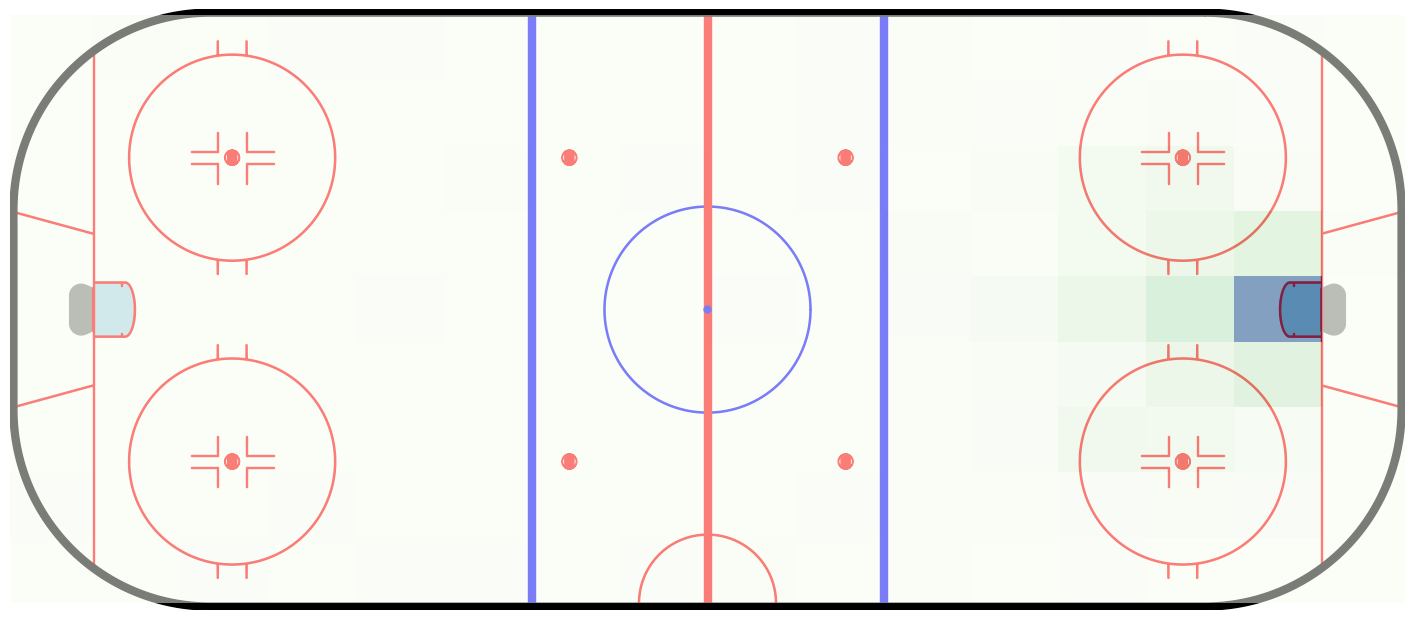

In [14]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(goals.statistic, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [15]:
move_prob = moving_actions.statistic / (moving_actions.statistic + shots.statistic)

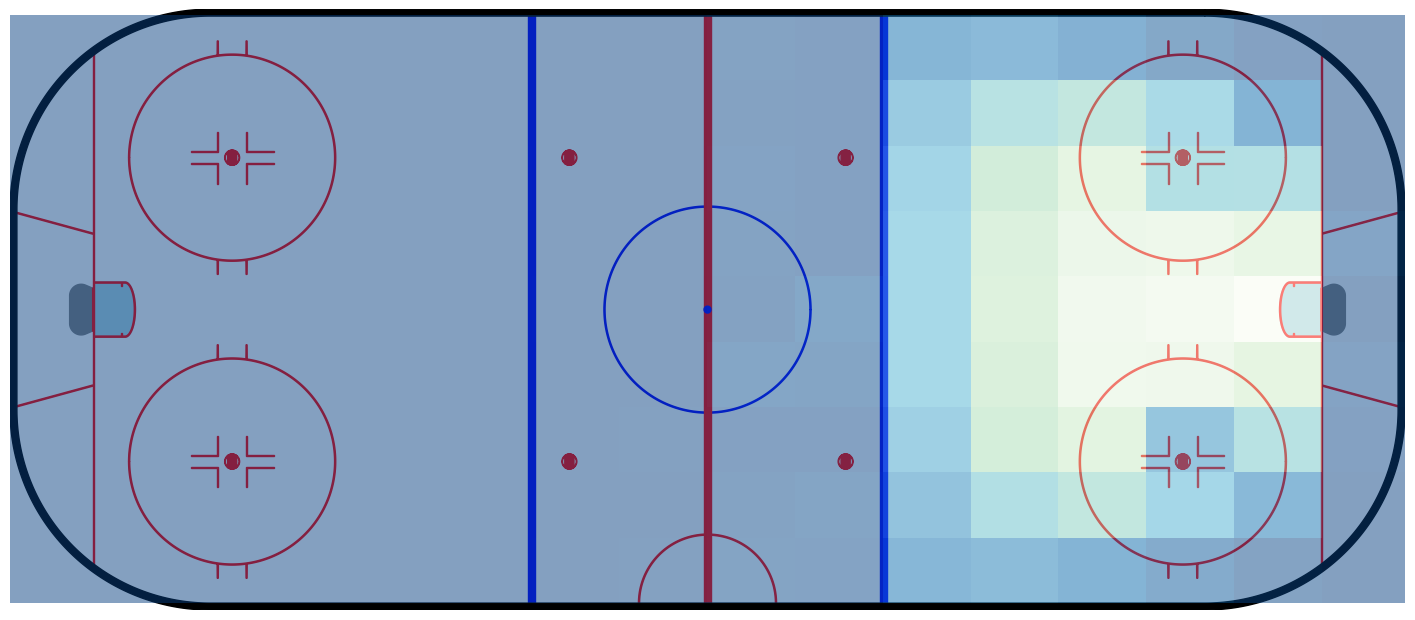

In [16]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(move_prob, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [17]:
shot_prob = shots.statistic / (moving_actions.statistic + shots.statistic)

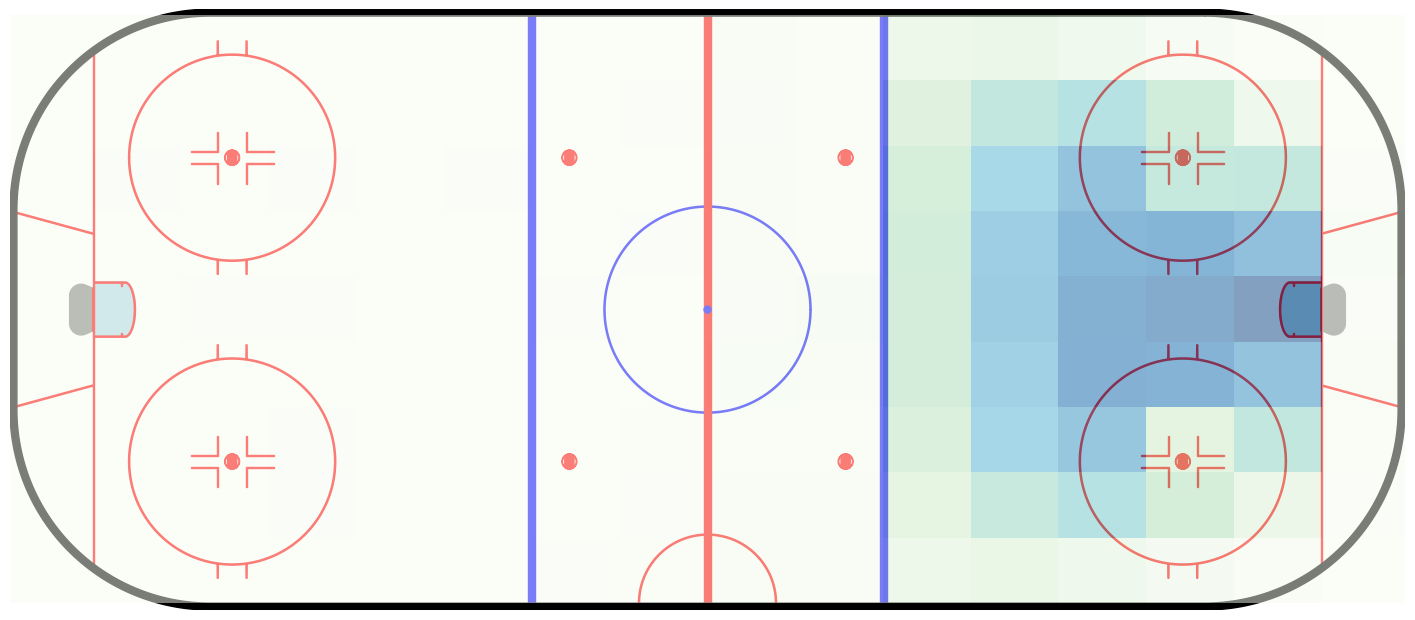

In [18]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(shot_prob, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [19]:
df_shots[['xadjcoord', 'yadjcoord', 'xg_allattempts']]
goal_prob = binned_statistic_2d(df_shots['yadjcoord'], df_shots['xadjcoord'], df_shots['xg_allattempts'], statistic='mean', bins=[ 85 / 9 * np.arange(-4.5, 5), (89 / 7) * np.arange(-8, 9)])

In [20]:
goal_prob = np.nan_to_num(goal_prob.statistic)

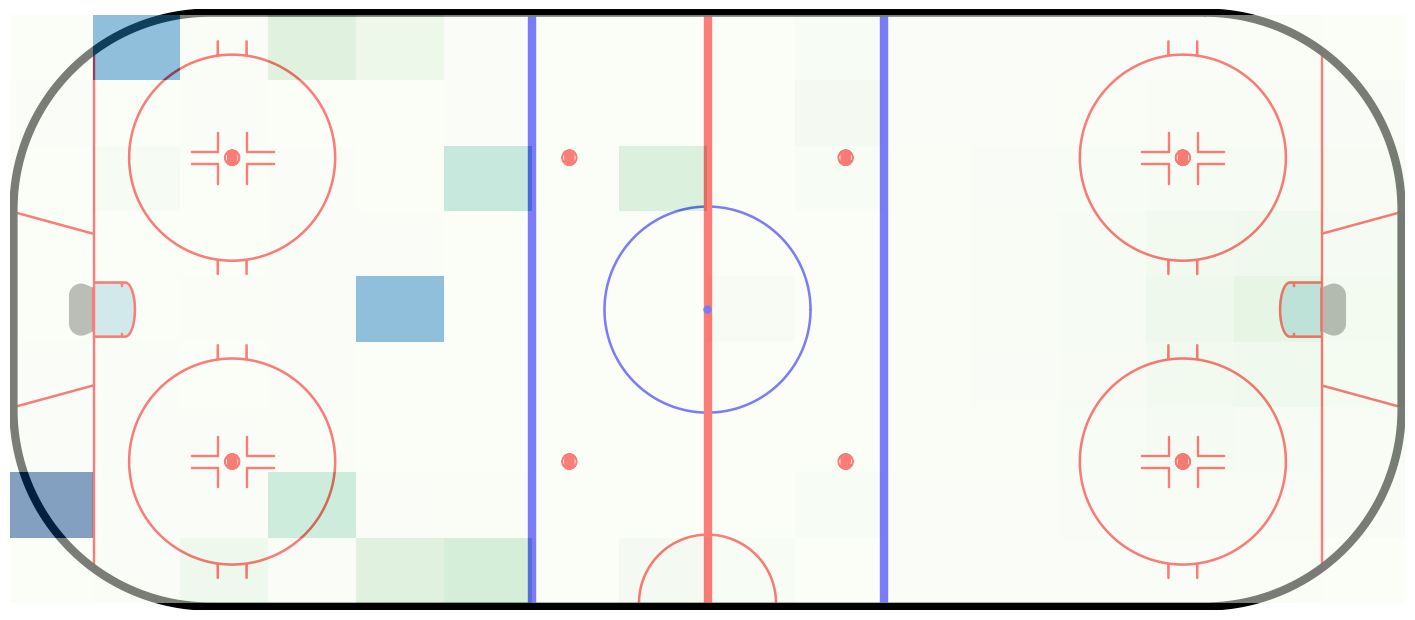

In [21]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(goal_prob, cmap='GnBu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [22]:
df_move = df_move[df_move['eventname'] != 'shot']

In [23]:
df_move.loc[:,'y_start'] = pd.cut(df_move.loc[:,'yadjcoord'], bins=9, labels=False)
df_move.loc[:,'x_start'] = pd.cut(df_move.loc[:,'xadjcoord'], bins=16, labels=False)
df_move.loc[:,'y_end'] = pd.cut(df_move.loc[:,'yadjcoord_end'], bins=9, labels=False)
df_move.loc[:,'x_end'] = pd.cut(df_move.loc[:,'xadjcoord_end'], bins=16, labels=False)

In [24]:
df_counts_starts_new = df_move[['x_start', 'y_start']].groupby(['x_start', 'y_start']).size().reset_index().rename(columns={0:'count_starts'})

In [25]:
transition_matrices = []
for i, row in df_counts_starts_new.iterrows():
    start_sector = row[['y_start', 'x_start']].values
    count_starts = row['count_starts']
    this_sector = df_move.loc[(df_move['y_start'] == start_sector[0]) & (df_move['x_start'] == start_sector[1])]
    df_counts_ends = this_sector[['y_end', 'x_end']].groupby(['y_end', 'x_end']).size().reset_index().rename(columns={0:'count_ends'})
    T_matrix = np.zeros((9, 16))
    for j, row2 in df_counts_ends.iterrows():
        end_sector = row2[['y_end', 'x_end']].values
        #print(end_sector[1])
        count_ends = row2['count_ends']
        T_matrix[int(end_sector[0]), int(end_sector[1])] = count_ends / count_starts
    T_matrix = T_matrix / count_starts
    transition_matrices.append(T_matrix)


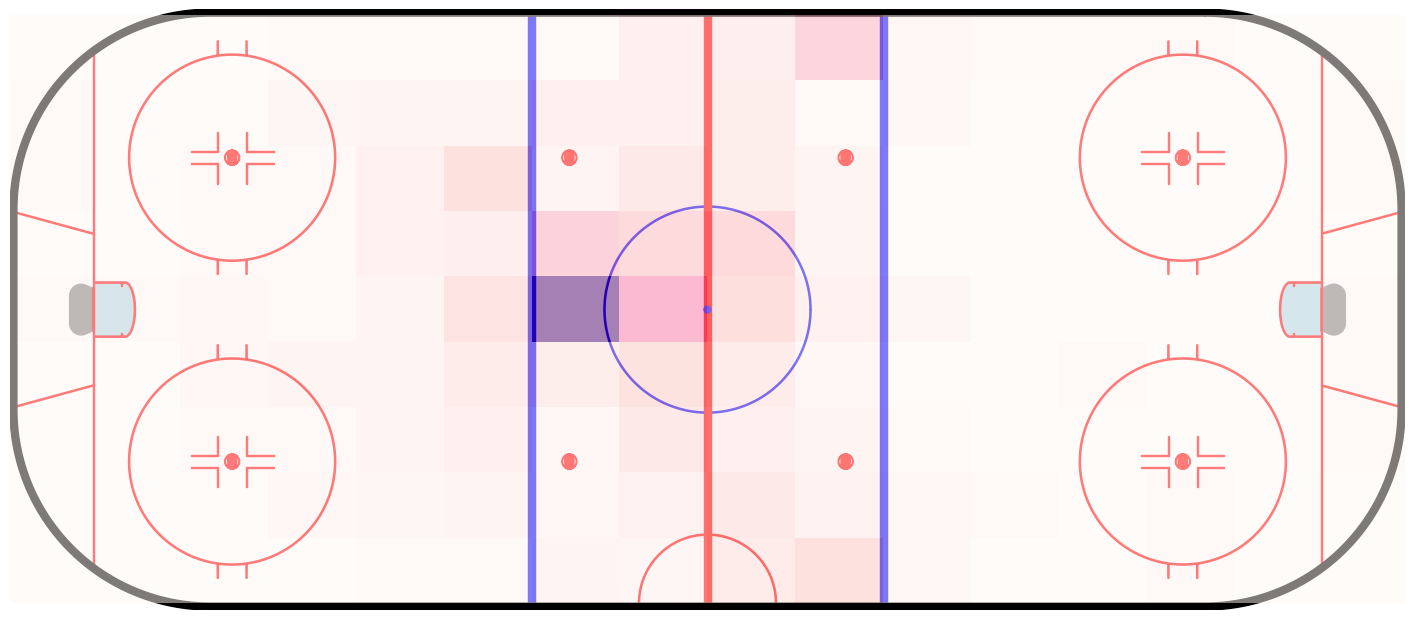

In [26]:
rink = NHLRink()
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(transition_matrices[58], cmap='RdPu', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)

plt.show()

In [52]:
transition_matrices_array = np.array(transition_matrices)
xT_off = np.zeros((9, 16))
for i in range(10):
    shot_expected_payoff = goal_prob*shot_prob
    move_expected_payoff = move_prob*(np.sum(np.sum(transition_matrices_array*xT_off, axis=2), axis=1).reshape(9, 16))
    xT__off_old = xT_off
    xT_off = shot_expected_payoff + move_expected_payoff
    # fig, ax = plt.subplots(figsize=(18, 8))
    # rink.draw(ax=ax)
    # plt.imshow(xT_off, cmap='magma_r', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)
    # txt = 'Expected Offensive Threat matrix after ' +  str(i+1) + ' moves'
    # plt.title(txt)
    # plt.show()
    # print(xT_off)

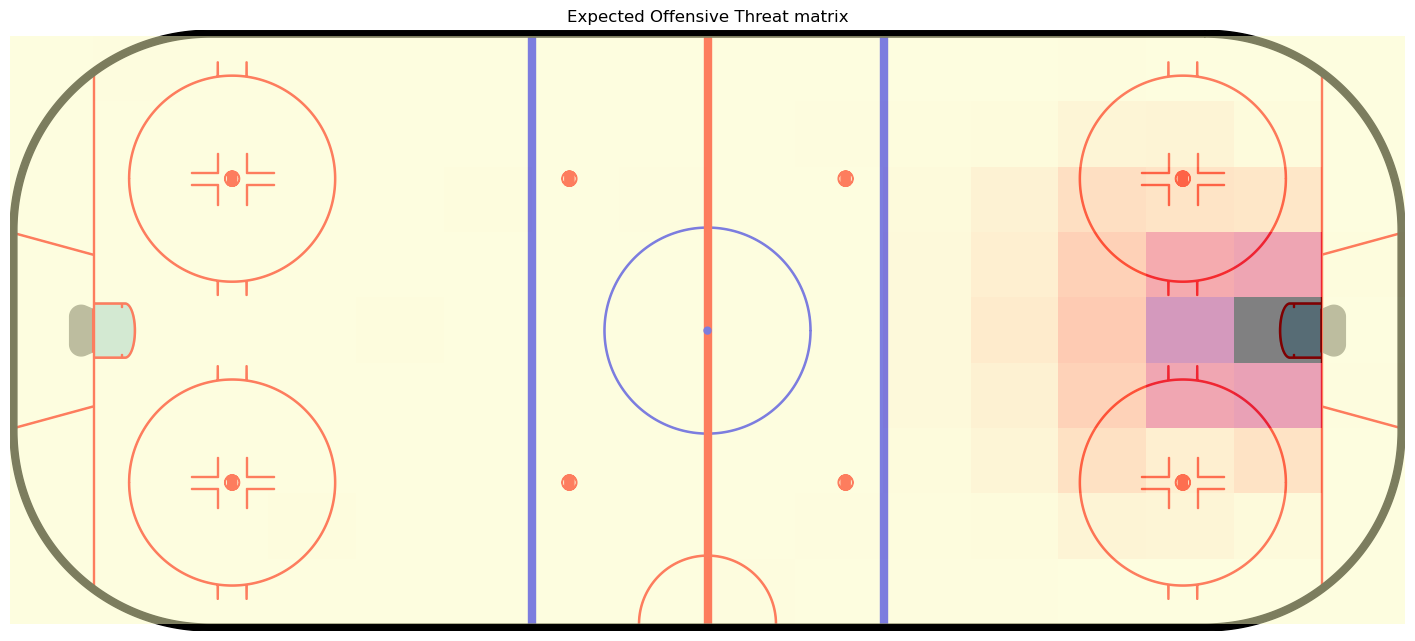

In [53]:
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(xT_off, cmap='magma_r', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)
txt = 'Expected Offensive Threat matrix'
plt.title(txt)
plt.show()

In [47]:
xT_def = np.flip(xT_off) * -1

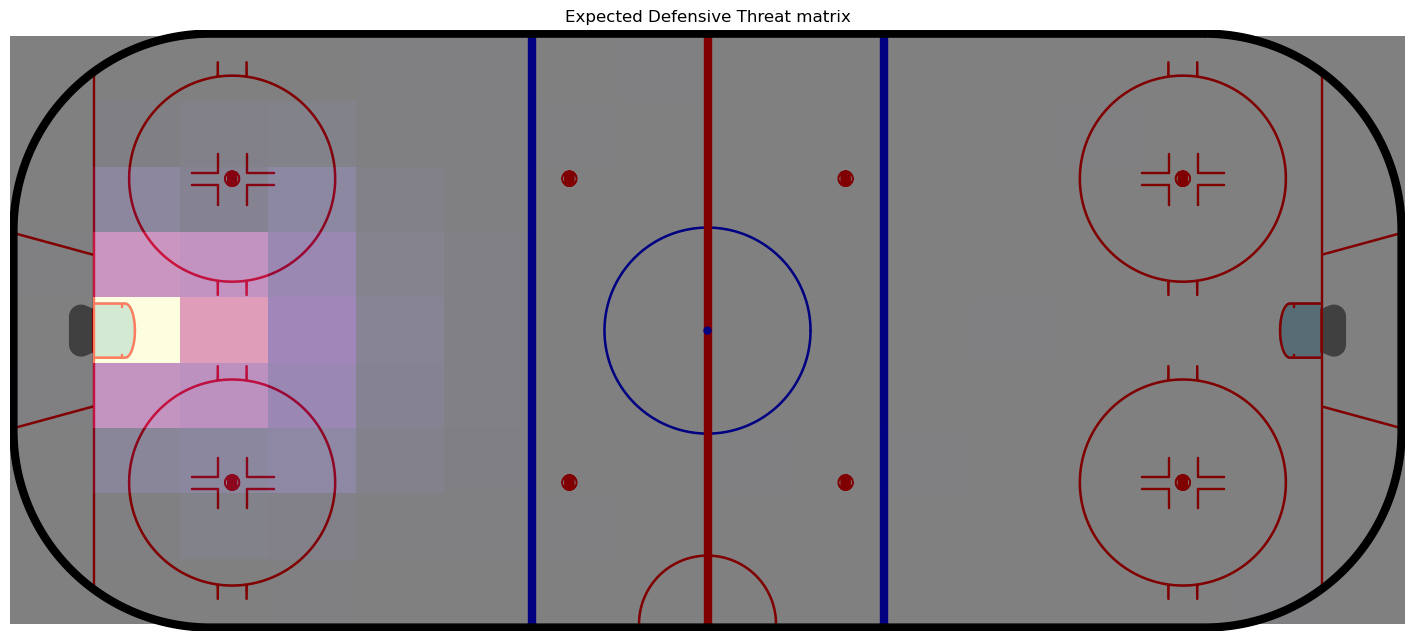

In [49]:
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(xT_def, cmap='magma_r', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)
txt = 'Expected Defensive Threat matrix'
plt.title(txt)
plt.show()

In [50]:
xT = xT_off + xT_def

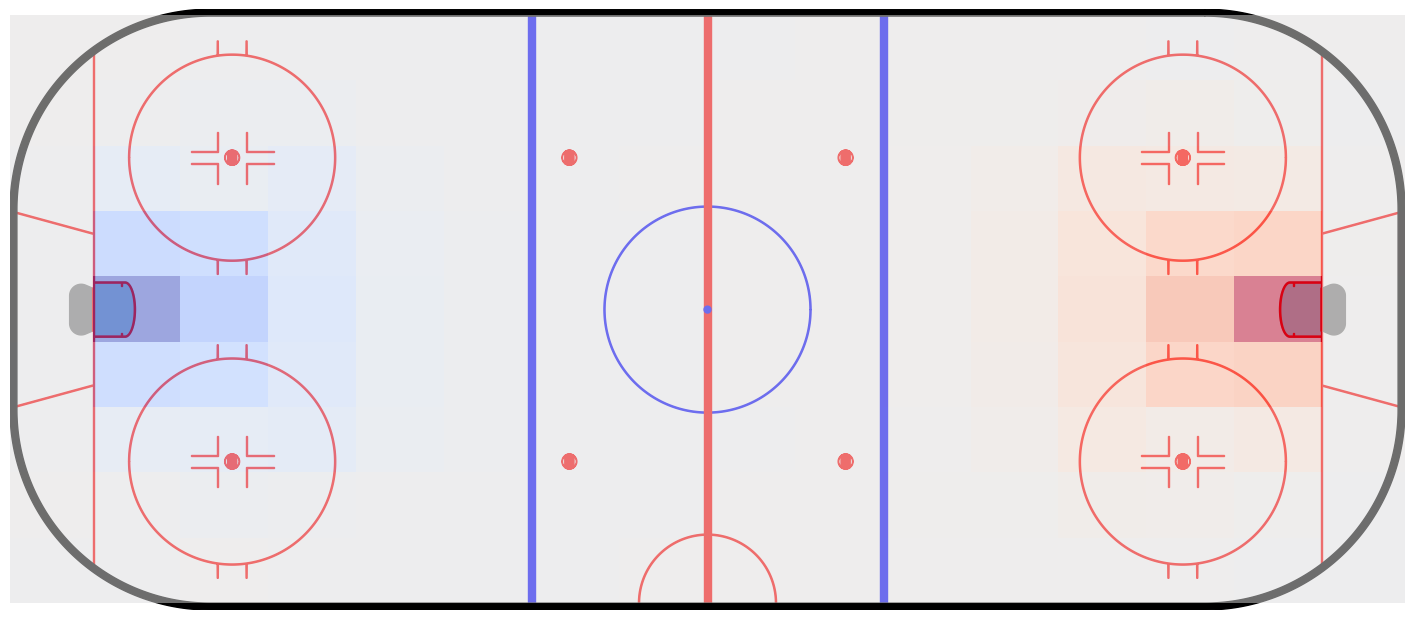

In [59]:
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(xT, cmap='coolwarm', origin='lower', extent=[-101.71428571, 101.71428571, -42.5, 42.5], alpha=0.5, zorder=100)
plt.show()

fig.savefig('figs/xt_net_overview.png', dpi=300, bbox_inches='tight')

In [33]:
 xT.min(), xT.max()

(-0.08405758759999285, 0.08405758759999285)

In [34]:
df_move.eventname.value_counts()

eventname
pass       128975
lpr        107131
carry       33914
dumpout      9367
dumpin       8570
Name: count, dtype: int64

In [35]:
# passes
df_move.loc[(df_move["outcome_code"] == 1), 'xT_off'] = df_move.loc[df_move["outcome_code"] == 1].apply(lambda row: xT_off[int(row.y_end)][int(row.x_end)] - xT_off[int(row.y_start)][int(row.x_start)], axis = 1)
df_move.loc[(df_move["outcome_code"] == 0), 'xT_off'] = df_move.loc[df_move["outcome_code"] == 0].apply(lambda row: -xT_off[row.y_start][row.x_start], axis = 1)
df_move.loc[(df_move["outcome_code"] == 1), 'xT_def'] = df_move.loc[df_move["outcome_code"] == 1].apply(lambda row: xT_def[int(row.y_end)][int(row.x_end)] - xT_def[int(row.y_start)][int(row.x_start)], axis = 1)
df_move.loc[(df_move["outcome_code"] == 0), 'xT_def'] = df_move.loc[df_move["outcome_code"] == 0].apply(lambda row: xT_def[row.y_start][row.x_start], axis = 1)
df_move['xT'] = df_move['xT_off'] + df_move['xT_def']
df_move.head()

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code,is_exit,is_entry,is_blocked,is_saved,is_assist,is_goal,next_event,interruption,next_teamid,next_teaminpossession,prev_event,xadjcoord_end,yadjcoord_end,y_start,x_start,y_end,x_end,xT_off,xT_def,xT
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2,1,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,814,885.0,faceoff,0.205826,0.245975,4,8,4.0,8.0,0.000000,0.000000,0.000000
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3,0,0.0,0.0,0.0,0.0,0.0,0.0,pass,0,885,885.0,lpr,-3.223473,-3.766563,4,7,4.0,7.0,-0.000003,-0.000327,-0.000330
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4,1,0.0,0.0,0.0,0.0,0.0,0.0,reception,0,885,885.0,lpr,-19.911827,11.310680,4,8,5.0,6.0,-0.000324,-0.000024,-0.000348
6,72393,172367.0,814,706220,553243.0,885,885.0,0.0,NaN,4.466667,pass,0,evenStrength,5,failed,1,D,0,5,north,-7.338295,26.398914,6,0,0.0,0.0,1.0,0.0,0.0,0.0,block,0,814,885.0,reception,-1.813835,24.897058,7,7,7.0,7.0,-0.000006,-0.000027,-0.000033
8,72393,553243.0,885,213380,172367.0,814,814.0,1.0,NaN,6.033333,lpr,1,evenStrength,5,successful,1,F,0,5,none,-17.800873,-40.991177,8,1,0.0,0.0,0.0,0.0,0.0,0.0,puckprotection,0,814,814.0,block,-16.794991,-40.488235,0,6,0.0,6.0,0.000000,0.000000,0.000000


In [36]:
df_games = df_games.merge(df_move[['eventid', 'xT_off','xT_def', 'xT']], on='eventid', how='left')

In [37]:
df_games.head()

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code,is_exit,is_entry,is_blocked,is_saved,is_assist,is_goal,next_event,interruption,next_teamid,next_teaminpossession,prev_event,xadjcoord_end,yadjcoord_end,xT_off,xT_def,xT
0,72393,553243.0,885,489917,172367.0,814,NaN,NaN,NaN,0.000000,faceoff_lost,1,evenStrength,5,failed,1,F,0,5,none,0.304306,0.251442,0,0,0.0,0.0,0.0,0.0,0.0,0.0,faceoff,0,885,NaN,start,NaN,NaN,NaN,NaN,NaN
1,72393,172367.0,814,435025,553243.0,885,NaN,NaN,NaN,0.000000,faceoff,0,evenStrength,5,successful,1,F,0,5,recovered,-0.304306,-0.251442,1,1,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,885,885.0,faceoff_lost,0.205826,0.245975,NaN,NaN,NaN
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2,1,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,814,885.0,faceoff,0.205826,0.245975,0.000000,0.000000,0.000000
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3,0,0.0,0.0,0.0,0.0,0.0,0.0,pass,0,885,885.0,lpr,-3.223473,-3.766563,-0.000003,-0.000327,-0.000330
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4,1,0.0,0.0,0.0,0.0,0.0,0.0,reception,0,885,885.0,lpr,-19.911827,11.310680,-0.000324,-0.000024,-0.000348


In [38]:
df_games.to_csv('data/df_Linhac_games_with_xT.csv', index=False)
df_move.to_csv('data/df_Linahc_move_with_xT.csv', index=False)

In [39]:
df_move[['eventname', 'xT']].groupby('eventname').agg(['sum','mean','min', 'max', 'count'])

xT                                      
                  sum      mean       min       max   count
eventname                                                  
carry        1.884497  0.000056 -0.085955  0.084511   33914
dumpin      10.516648  0.001227 -0.009012  0.084382    8570
dumpout     21.397896  0.002284 -0.084058  0.168115    9367
lpr       -134.369029 -0.001254 -0.168115  0.128446  107131
pass         5.899421  0.000046 -0.084387  0.084486  128916

In [40]:
df_move.head()

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code,is_exit,is_entry,is_blocked,is_saved,is_assist,is_goal,next_event,interruption,next_teamid,next_teaminpossession,prev_event,xadjcoord_end,yadjcoord_end,y_start,x_start,y_end,x_end,xT_off,xT_def,xT
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2,1,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,814,885.0,faceoff,0.205826,0.245975,4,8,4.0,8.0,0.000000,0.000000,0.000000
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3,0,0.0,0.0,0.0,0.0,0.0,0.0,pass,0,885,885.0,lpr,-3.223473,-3.766563,4,7,4.0,7.0,-0.000003,-0.000327,-0.000330
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4,1,0.0,0.0,0.0,0.0,0.0,0.0,reception,0,885,885.0,lpr,-19.911827,11.310680,4,8,5.0,6.0,-0.000324,-0.000024,-0.000348
6,72393,172367.0,814,706220,553243.0,885,885.0,0.0,NaN,4.466667,pass,0,evenStrength,5,failed,1,D,0,5,north,-7.338295,26.398914,6,0,0.0,0.0,1.0,0.0,0.0,0.0,block,0,814,885.0,reception,-1.813835,24.897058,7,7,7.0,7.0,-0.000006,-0.000027,-0.000033
8,72393,553243.0,885,213380,172367.0,814,814.0,1.0,NaN,6.033333,lpr,1,evenStrength,5,successful,1,F,0,5,none,-17.800873,-40.991177,8,1,0.0,0.0,0.0,0.0,0.0,0.0,puckprotection,0,814,814.0,block,-16.794991,-40.488235,0,6,0.0,6.0,0.000000,0.000000,0.000000


In [41]:
np.savetxt('data/xT.csv', xT, delimiter=',')
np.savetxt('data/xT_off.csv', xT_off, delimiter=',')
np.savetxt('data/xT_def.csv', xT_def, delimiter=',')